<h1><center>Data Analysis for Electric Vehicle Population</center></h1>

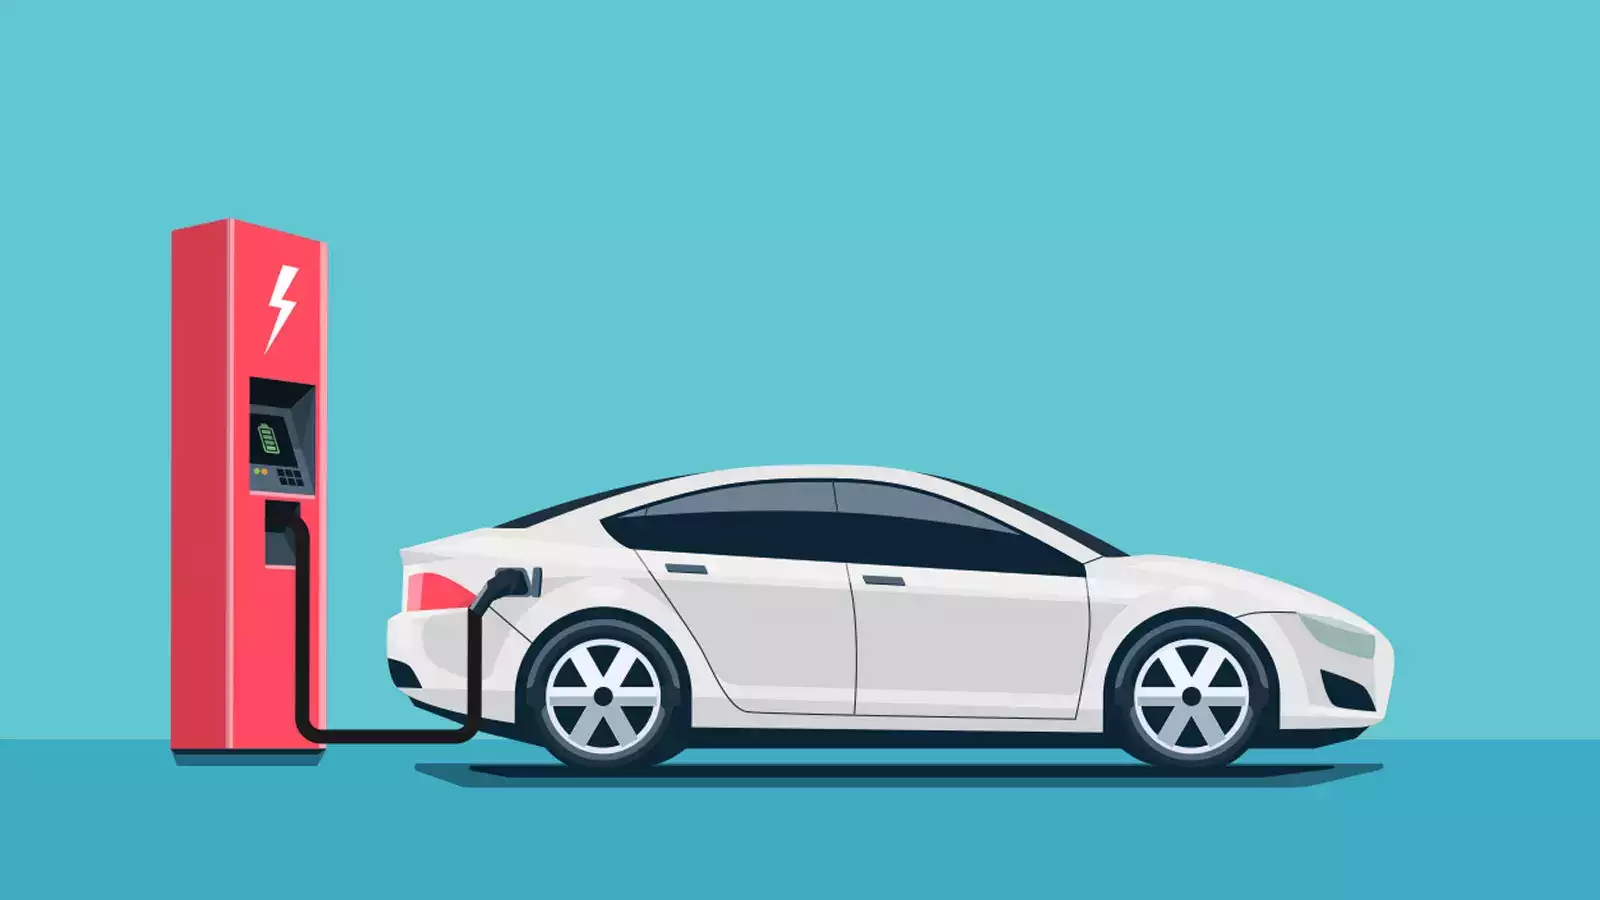

<h5><center>Figure-1: Electric Vehicle</center></h5>

  ### Author: Lakshmi Kant
* Linkedin: https://www.linkedin.com/in/digiaiworld/
* Portfolio Website: https://digiaiworld.netlify.app/
* GitHub: https://github.com/DigiAIWorld

### About Data

* **Data:** This dataset lists the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently (April-2023) registered with the Department of Licencing (DOL) of Washington State (USA). 

* **You can get the data at:** https://catalog.data.gov/dataset/electric-vehicle-population-data

* **Task:** Using the provided dataset, we want to do exploratory data analysis (EDA). The EDA will serve as the foundation for the necessary Data Wrangling activities to be carried out for the purposes of data cleansing and normalization. During the coding process, we will document our observations. Eventually, we will produce a summary and draw conclusions from our findings.

### Objectives:
The main goal of this project is to thoroughly analyze the dataset in order to find important insights. The battery-electric and plug-in hybrid electric vehicles (BEVs and PHEVs) that are currently registered with the Washington State Department of Licencing (DOL) are displayed in this dataset. Our goal was to develop a justification for the population of plug-in hybrid electric vehicles (PHEVs) and battery electric vehicles (BEVs).

On the relevant dataset, we will apply **EDA** in an effort to observe and research the dynamics of churn transformation.

### Import Libraries:
We will use the follwoing libraries.
1. **Pandas:** Data manipulation and analysis library.
2. **Numpy:** Numerical computing library.
3. **Matplotlib:** Data visualization library.
4. **Seaborn:** Statistical data visualization library.
5. **Scipy:** To provide a comprehensive set of numerical algorithms and tools for scientific computing in Python.
6. **Shapely:** Shapely is a BSD-licensed Python package for manipulation and analysis of planar geometric objects.
7. **GeoPandas:** To make working with geospatial data in python easier.

### Glossary / Data Dictionary / Important Terms:
* **'VIN (1-10)':** The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).
* **'County':** The county in which the registered owner resides.
* **'City':** The city in which the registered owner resides
* **'State':** The state in which the registered owner resides
* **'Postal Code':** The 5 digit zip code in which the registered owner resides
* **'Model Year':** The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN)
* **'Make':** The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN)
* **'Model':** The model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).
* **'Electric Vehicle Type':** This distinguishes the vehicle as all electric or a plug-in hybrid.
* **'Clean Alternative Fuel Vehicle (CAFV) Eligibility':** This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.

* **'Electric Range':** Describes how far a vehicle can travel purely on its electric charge.

* **'Base MSRP':** This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.
* **'Legislative District':** The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.
* **'DOL Vehicle ID':** Unique number assigned to each vehicle by Department of Licensing for identification purposes.
* **'Vehicle Location':** The center of the ZIP Code for the registered vehicle.
* **'Electric Utility':** This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe | delimits utilities of same TYPE and a double pipe || delimits utilities of different types. We combined vehicle address and Homeland Infrastructure Foundation Level Database (HIFLD) Retail_Service_Territories feature layer using a geographic information system to assign values for this field. Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.

* **'2020 Census Tract':** The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID)

In [1]:
# import some basic libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scientific and statistical computing
import scipy as sp

# To make working with geospatial data in python easier
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

plt.style.use('ggplot')

## 1. Data Loading, Exploration & Wrangling
We will proceed as follow:

1. Load the csv file with the pandas
2. Creating the dataframe and understanding the data present in the dataset
3. Dealing with the missing data and the incorrect records

In [2]:
# Load the dataset 
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

### Analysing & describing the dataset
This code snippet helps us to get a complete overview of our data by adjusting a key display setting in Pandas. By setting the option to show all columns, you can ensure that no valuable information is overlooked when working with dataframes. Whether you're exploring data, conducting analyses or simply trying to get a better sense of your data, this simple line of code can make a big difference.

In [3]:
pd.set_option('display.max_columns', None)

### Get a sneak peek of our data
With just a single line of code! Quickly view the top rows of your dataset to get a sense of what you're working with, without having to scroll through the entire file.

In [4]:
df.head()

VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJ3E1EB4L     Yakima     Yakima    WA      98908.0        2020  TESLA   
1  5YJ3E1EA7K  San Diego  San Diego    CA      92101.0        2019  TESLA   
2  7JRBR0FL9M       Lane     Eugene    OR      97404.0        2021  VOLVO   
3  5YJXCBE21K     Yakima     Yakima    WA      98908.0        2019  TESLA   
4  5UXKT0C5XH  Snohomish    Bothell    WA      98021.0        2017    BMW   

     Model                   Electric Vehicle Type  \
0  MODEL 3          Battery Electric Vehicle (BEV)   
1  MODEL 3          Battery Electric Vehicle (BEV)   
2      S60  Plug-in Hybrid Electric Vehicle (PHEV)   
3  MODEL X          Battery Electric Vehicle (BEV)   
4       X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             322   
1           Clean Alternative Fuel Vehicle Eligible             220   
2             Not eligible due to low battery range              22   
3           Clean Alternative Fuel Vehicle Eligible             289   
4             Not eligible due to low battery range              14   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  14.0       127175366   
1          0                   NaN       266614659   
2          0                   NaN       144502018   
3          0                  14.0       477039944   
4          0                   1.0       106314946   

              Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-120.56916 46.58514)              PACIFICORP       5.307700e+10  
1  POINT (-117.16171 32.71568)                     NaN       6.073005e+09  
2  POINT (-123.12802 44.09573)                     NaN       4.103900e+10  
3  POINT (-120.56916 46.58514)              PACIFICORP       5.307700e+10  
4   POINT (-122.18384 47.8031)  PUGET SOUND ENERGY INC       5.306105e+10

### View the shape of the dataset

In [5]:
df.shape

(124716, 17)

### View the column names

In [6]:
df.columns.unique()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

### Observation Number 1
Upon initial viewing of the data, it has come to our attention towards the relevance or irrelavnce of particular columns:

1. **VIN (1-10):** It is a unique identifier or index.
2. **Postal Code:** is stored as float format., we need to convert that into integer.
3. **Base MSRP:** The lowest Manufacturer's Suggested Retail Price (MSRP), a very important column however we need to see the health of this column if it has been populated or not
4. **Model Year, Make, Model:** are already all presented by decoding the VIN (1-10) id.,
5. **Electric Utility:** represents Electric Retail Services. | represnets service provider from same vendors, || service provider from multiple vendors, Blank represents Not Available
6. **Few column names are with spaces. We will rename these columns:**
    *  Postal Code
    *  Model Year
    *  Electric Vehicle Type
    *  Clean Alternative Fuel Vehicle (CAFV) Eligibility
    *  Electric Range
    *  Base MSRP
    *  Legislative District
    *  DOL Vehicle ID
    *  Vehicle Location
    *  Electric Utility
    *  2020 Census Tract
    
We Can present the information stored in the Electric Utility: |, || and blank as:\ However, before any renaming. We will see the health of the attribute in terms of NULL values

* Single Type Utility
* Multi type Utility
* Not Available

These columns may be purged at later stage of this analysis (if required)

* Base MSRP
* Legislative District   

### Descriptive Statistics
We use descriptive statistics to summarize and understand the key features of dataset.

In [8]:
df.describe().style.background_gradient(cmap='Blues')

### Check missing values in the data

In [9]:
df.isnull().sum().sort_values(ascending = False)

Electric Utility                                     473
Legislative District                                 297
Model                                                181
Vehicle Location                                      29
2020 Census Tract                                      2
City                                                   2
Postal Code                                            2
County                                                 2
Base MSRP                                              0
DOL Vehicle ID                                         0
VIN (1-10)                                             0
Electric Range                                         0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Make                                                   0
Model Year                                             0
State                                                  0
Electric Vehicle Type                                  0
dtype: int64

## 2. Exploratory Data Analysis and Visualization

Text(0.5, 1.0, 'Missing null values')

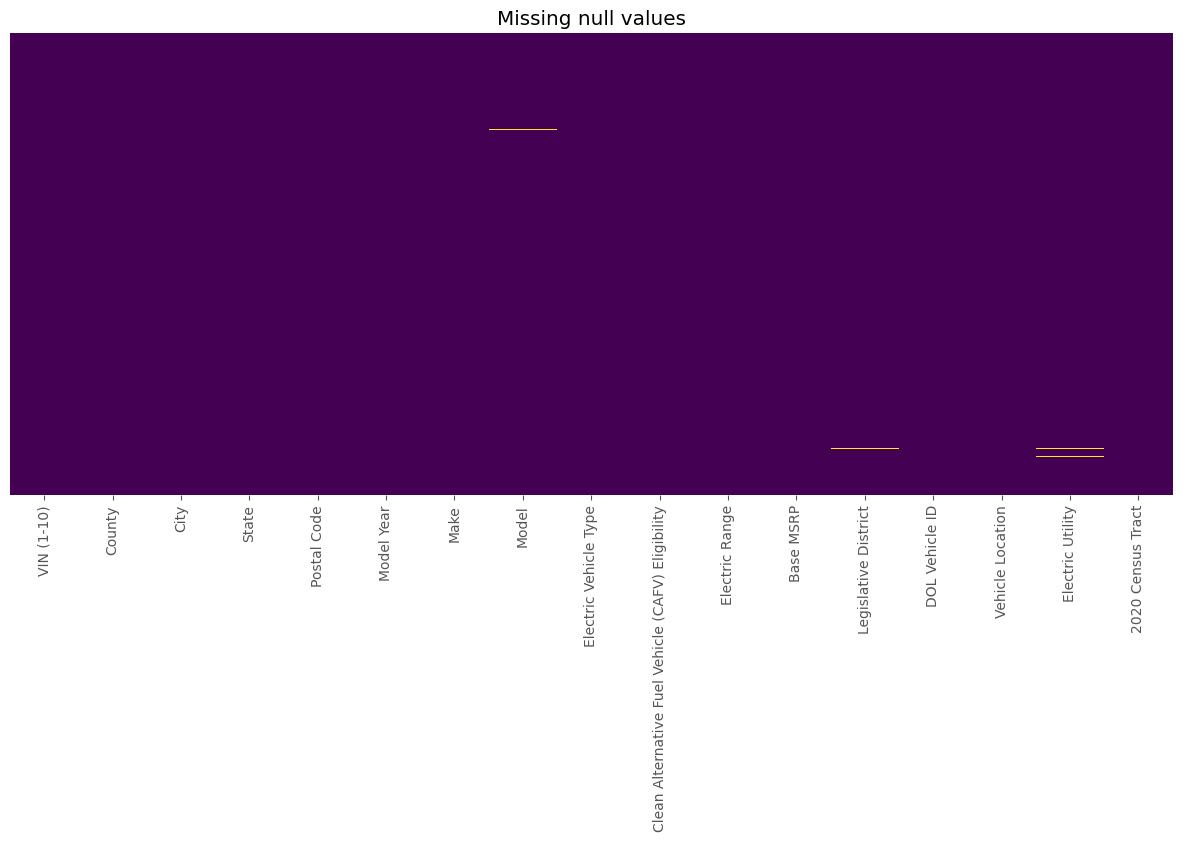

In [10]:
plt.rcParams['figure.figsize'] = (15,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

<h5><center>Figure-2: Provide us the visual on the missing values in a dataframe 'df'</center></h5>

In [11]:
# Get a clearer picture of missing data with this nifty code snippet!
# See the percentage of null values in our dataset sorted in ascending order, making it easy to identify which features have the most missing data.
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Electric Utility                                     0.379262
Legislative District                                 0.238141
Model                                                0.145130
Vehicle Location                                     0.023253
2020 Census Tract                                    0.001604
City                                                 0.001604
Postal Code                                          0.001604
County                                               0.001604
Base MSRP                                            0.000000
DOL Vehicle ID                                       0.000000
VIN (1-10)                                           0.000000
Electric Range                                       0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Make                                                 0.000000
Model Year                                           0.000000
State                                                0.000000
Electric

### Observation Number 2
Dealing with the null values:

* **Electric Utility:** null values will be filled with text 'Utility Not Avalilable'
* **Legislative District:** null values will be filled with text 'Unknown'
* **Vehicle Location:** null values will be filled with text 'Unknown'
* **Model:** null values will be filled with text 'Unknown'
* **2020 Census Tract:** null values will be filled with text 'Unknown'
* **City:** null values will be filled with text 'Unknown'
* **Postal Code:** null values will be filled with mean()
* **County:** null values will be filled with text 'Unknown'

In [12]:
df['Electric Utility'] = df['Electric Utility'].fillna('Utility Not Avalilable')
df['Legislative District'] = df['Legislative District'].fillna('Unknown')
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')
df['2020 Census Tract'] = df['2020 Census Tract'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')

# fill null values in the 'Postal Code' column with the mean salary
mean_postcode = df['Postal Code'].mean()
df['Postal Code'] = df['Postal Code'].fillna(mean_postcode)

df['County'] = df['County'].fillna('Unknown')

In [13]:
# Get a clearer picture of missing data with this nifty code snippet! 
# See the percentage of null values in our dataset sorted in ascending order, making it easy to identify which features have the most missing data.
missing_percentage1 = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage1

VIN (1-10)                                           0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Utility                                     0.0
Vehicle Location                                     0.0
DOL Vehicle ID                                       0.0
Legislative District                                 0.0
Base MSRP                                            0.0
Electric Range                                       0.0
Electric Vehicle Type                                0.0
County                                               0.0
Model                                                0.0
Make                                                 0.0
Model Year                                           0.0
Postal Code                                          0.0
State                                                0.0
City                                                 0.0
2020 Census Tract                                    0.0
dtype: float64

As observed in **Observation Number 1, Postal Code:** is stored as float format., we need to convert that into integer

In [14]:
# convert the 'Postal Code ' attribute from float to integer
df['Postal Code'] = df['Postal Code'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         124716 non-null  object
 1   County                                             124716 non-null  object
 2   City                                               124716 non-null  object
 3   State                                              124716 non-null  object
 4   Postal Code                                        124716 non-null  int32 
 5   Model Year                                         124716 non-null  int64 
 6   Make                                               124716 non-null  object
 7   Model                                              124716 non-null  object
 8   Electric Vehicle Type                              124716 non-null  object
 9   Clea

### Observation Number 3
Dealing with the column names with spaces in between them

Athough its not a critical issue, but for the ease of coding & readability., We will rename the following columns to remove any extra space in column names:

* **Postal Code:** PostalCode
* **Model Year:** ModelYear
* **Electric Vehicle Type:** Electric_Vehicle_Type
* **Clean Alternative Fuel Vehicle (CAFV) Eligibility:** CAFV_Eligibility
* **Electric Range:** Electric_Range
* **Base MSRP:** Base_MSRP
* **Legislative District:** Legislative_District
* **DOL Vehicle ID:** DOL_Vehicle_ID
* **Vehicle Location:** Vehicle_Location
* **Electric Utility:** Electric_Utility
* **2020 Census Tract:** 2020_Census_Tract
* **VIN (1-10):** VIN

In [16]:
# rename columns 
df = df.rename(columns={'Postal Code': 'PostalCode', 'Model Year': 'ModelYear', 'Electric Vehicle Type': 'Electric_Vehicle_Type', 
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
                        'Electric Range':'Electric_Range', 'Base MSRP': 'Base_MSRP', 'Legislative District':'Legislative_District',
                        'DOL Vehicle ID': 'DOL_Vehicle_ID',
                        'Vehicle Location':'Vehicle_Location',
                        'Electric Utility':'Electric_Utility',
                        '2020 Census Tract':'2020_Census_Tract',
                        'VIN (1-10)':'VIN'})
print(df.columns)

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')


In [17]:
# have a view of refreshed dataset again
df.isnull().sum().sort_values(ascending = False)

VIN                      0
CAFV_Eligibility         0
Electric_Utility         0
Vehicle_Location         0
DOL_Vehicle_ID           0
Legislative_District     0
Base_MSRP                0
Electric_Range           0
Electric_Vehicle_Type    0
County                   0
Model                    0
Make                     0
ModelYear                0
PostalCode               0
State                    0
City                     0
2020_Census_Tract        0
dtype: int64

### Observation Number 4
We have a clean data set

In [18]:
# Find duplications and Analyse them if its a valid Duplication.
df.duplicated().any()

False

In [19]:
df.columns.unique()

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [20]:
any_duplicates = df.duplicated(subset=['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract']).any()

In [21]:
any_duplicates

False

### Observation Number 5
No duplication found.

### Describe the Dataset

In [22]:
df.describe().style.background_gradient(cmap='Blues')

## 2.1 Now exploring Numeric columns or attributes of the dataset mainly:
PostalCode, ModelYear, Electric_Range, Base_MSRP, DOL_Vehicle_ID

### Let us check how numerical values are correlated ot each other

C:\Users\Lakshmi Kant\AppData\Local\Temp\ipykernel_828\3934209746.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(df.corr(),cmap=cmap, annot=True)


Text(0.5, 1.0, 'Electric Vehicle Correlation with Heatmap')

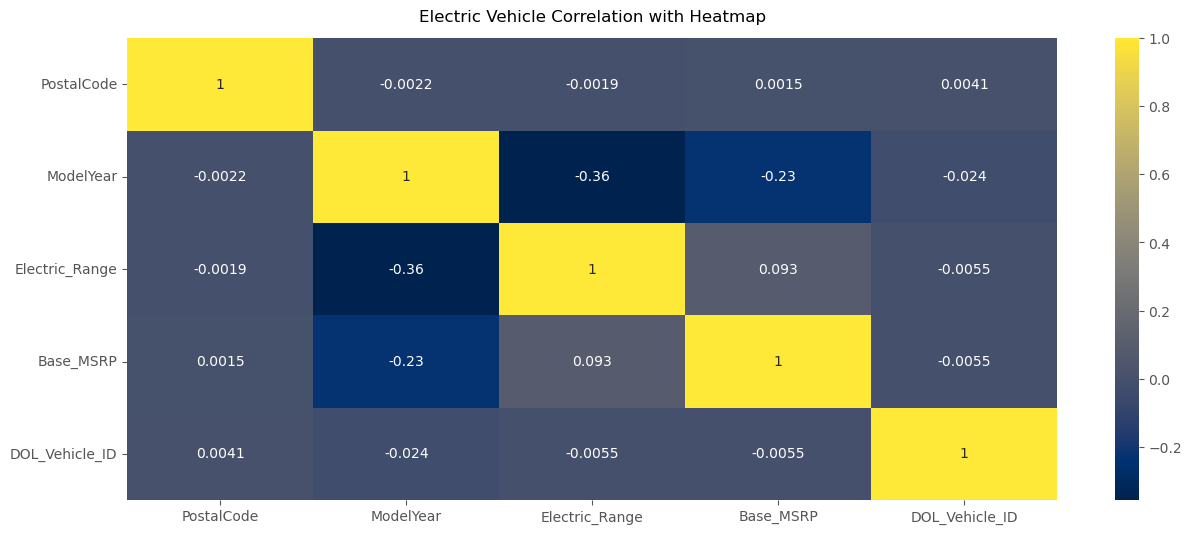

In [23]:
# checking the corrlation of all the attributes with target
plt.figure(figsize=(15, 6))
cmap = "cividis"
heatmap=sns.heatmap(df.corr(),cmap=cmap, annot=True)
heatmap.set_title('Electric Vehicle Correlation with Heatmap', fontdict={'fontsize':12}, pad=12)

<h5><center>Figure-3: Provide us the visual correlation among the numerical attributes of the dataset</center></h5>

### Observation Number 6
The correlation plot provides us many insights as follow:

No strong correlation found among the attributes

## 2.2 Distribution of numerical variables
ModelYear, Electric_Range, Base_MSRP, DOL_Vehicle_ID

Text(0, 0.5, 'Count')

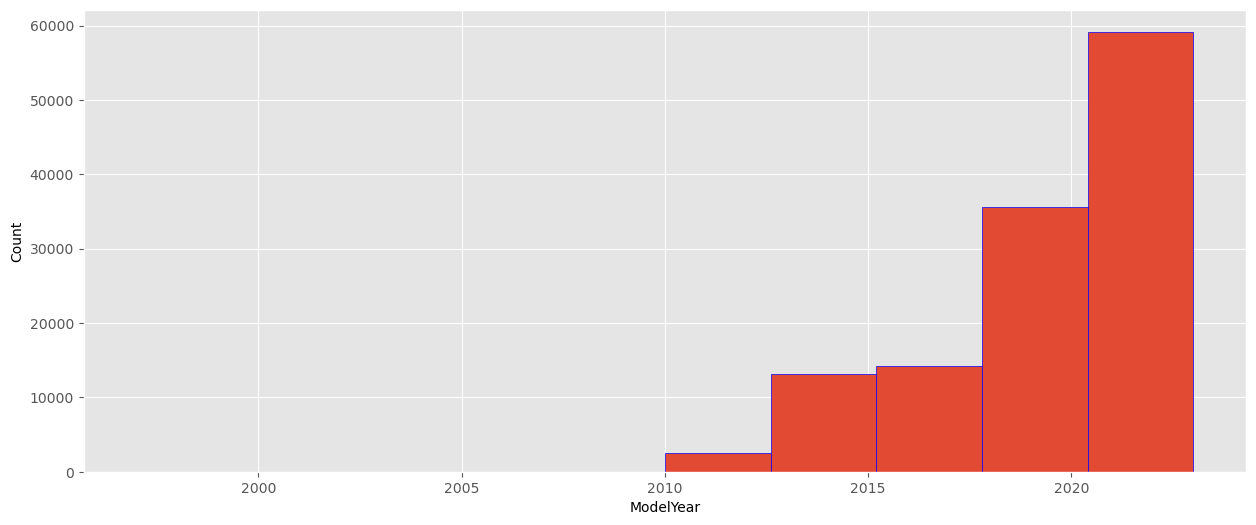

In [24]:
# Create a histogram of the PostalCode variable
plt.hist(df["ModelYear"], bins=10, edgecolor='blue')
plt.xlabel("ModelYear")
plt.ylabel("Count")

<h5><center>Figure-4: Histogram plot to check the normality and distribution of Model Year attribute</center></h5>

Text(0, 0.5, 'Count')

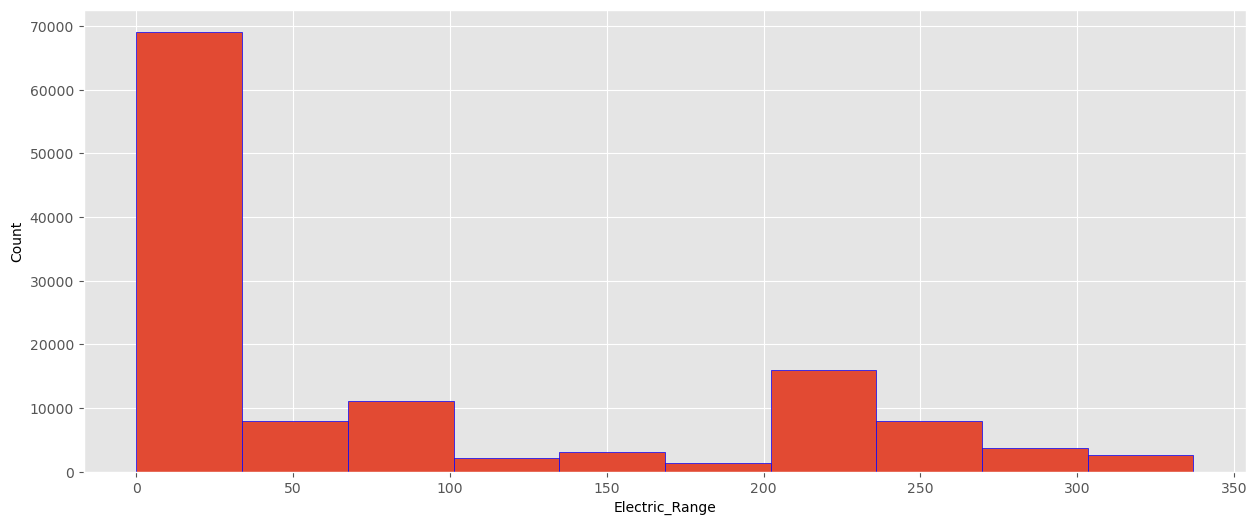

In [25]:
plt.hist(df["Electric_Range"],bins=10,edgecolor='blue')
plt.xlabel("Electric_Range")
plt.ylabel("Count")

<h5><center>Figure-5: Histogram plot to check the normality and distribution of Electric Range of the Cars in one charge</center></h5>

Text(0, 0.5, 'Count')

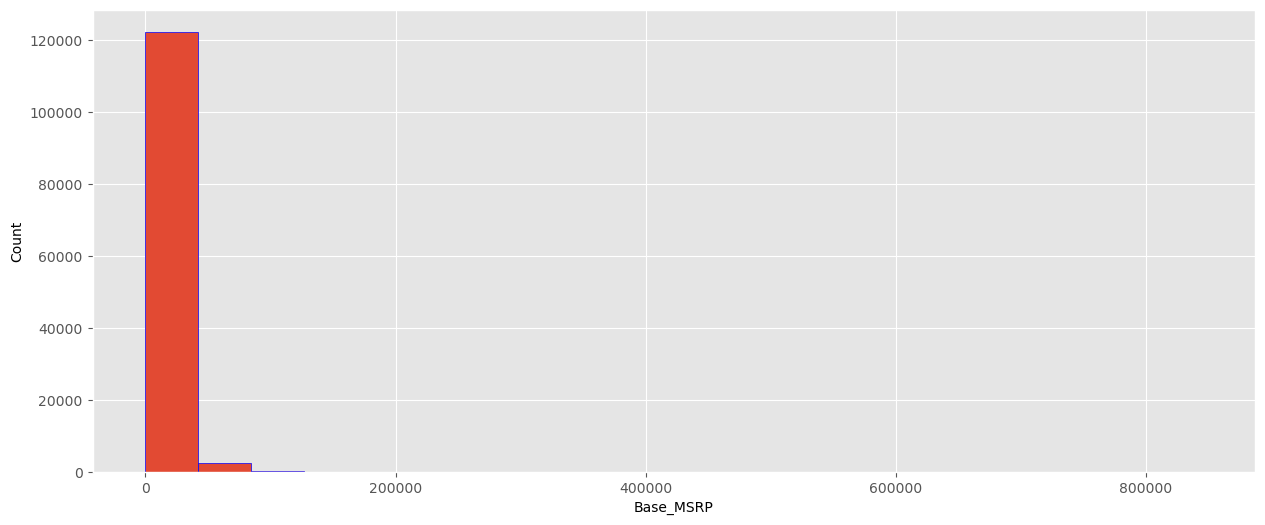

In [26]:
plt.hist(df["Base_MSRP"],bins=20,edgecolor='blue')
plt.xlabel("Base_MSRP")
plt.ylabel("Count")

<h5><center>Figure-6: Histogram plot to check the normality and distribution of Base MRP</center></h5>

Text(0, 0.5, 'Count')

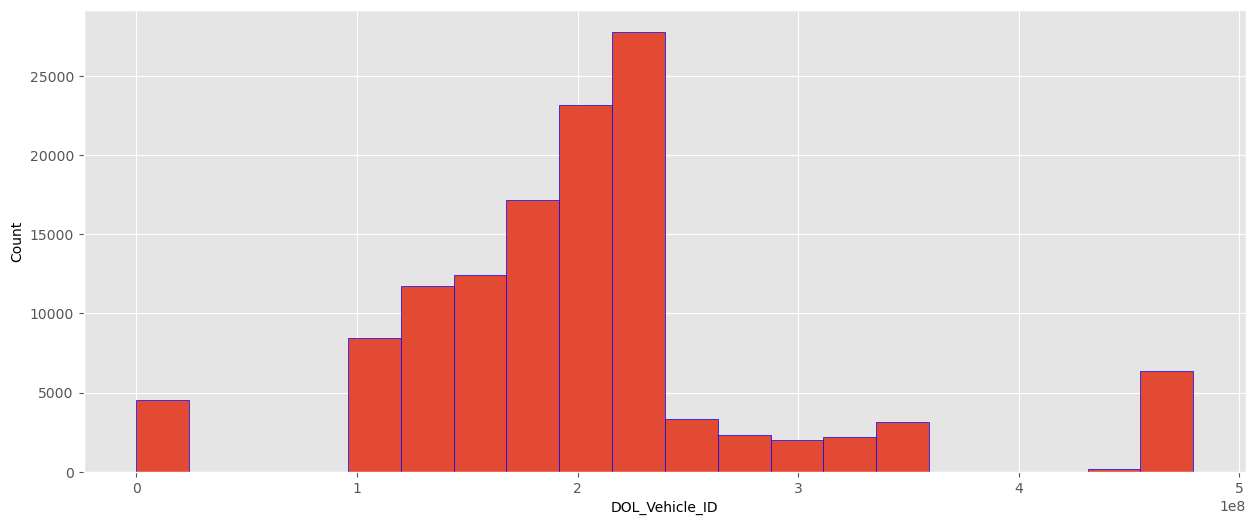

In [27]:
plt.hist(df["DOL_Vehicle_ID"],bins=20, edgecolor='blue')
plt.xlabel("DOL_Vehicle_ID")
plt.ylabel("Count")

<h5><center>Figure-7: Histogram plot to check the normality and distribution of DOL Vehicle ID</center></h5>

### Observation Number 7
From the histogram plots we can observe

* Although the Base MSRP column is very important, however the vendors have not provided this information. Therefore we will drop it
* The electric range colum of around 50K cars are not provided with legit information. Instead it is filled with zero

In [28]:
df['Base_MSRP'].unique()

array([     0,  31950,  69900,  52900,  33950,  64950,  54950,  75095,
        32250,  81100,  53400,  39995,  44100,  36800,  36900,  98950,
        45600,  55700,  34995,  59900,  43700, 110950, 102000,  52650,
       184400,  90700,  89100,  91250, 109000,  32995, 845000],
      dtype=int64)

In [29]:
df.drop('Base_MSRP', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VIN                    124716 non-null  object
 1   County                 124716 non-null  object
 2   City                   124716 non-null  object
 3   State                  124716 non-null  object
 4   PostalCode             124716 non-null  int32 
 5   ModelYear              124716 non-null  int64 
 6   Make                   124716 non-null  object
 7   Model                  124716 non-null  object
 8   Electric_Vehicle_Type  124716 non-null  object
 9   CAFV_Eligibility       124716 non-null  object
 10  Electric_Range         124716 non-null  int64 
 11  Legislative_District   124716 non-null  object
 12  DOL_Vehicle_ID         124716 non-null  int64 
 13  Vehicle_Location       124716 non-null  object
 14  Electric_Utility       124716 non-null  object
 15  

## 2.3 Dealing with column Electric Utility
We Can present the information stored in the Electric Utility: |, || ,Utility Not Avalilable and just one utility optionn as: However, before any renaming. We will see the health of the attribute in terms of NULL values

* Not Available"
* Single Type Utilities"
* "Multi type Utilities"
* "Only One Option"

In [30]:
df['Electric_Utility'].unique()

array(['PACIFICORP', 'Utility Not Avalilable', 'PUGET SOUND ENERGY INC',
       'PUD NO 2 OF GRANT COUNTY',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUD NO 1 OF CHELAN COUNTY', 'AVISTA CORP',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATION DISTRICT #15',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF PACIFIC COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF MILTON - (WA)|CITY OF TACOMA - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||ORCAS POWE

In [31]:
def categorize_electric_utility(value):
    if value == "Utility Not Avalilable":
        return "Not Available"
    elif "||" in value:
        return "Multi type Utilities"
    elif "|" in value:
        return "Single Type Utilities"
    else:
        return "Only One Option"

df['Electric_Utility_Category'] = df['Electric_Utility'].apply(categorize_electric_utility)

In [32]:
df['Electric_Utility_Category'].unique()

array(['Only One Option', 'Not Available', 'Multi type Utilities',
       'Single Type Utilities'], dtype=object)

In [33]:
df.head()

VIN     County       City State  PostalCode  ModelYear   Make  \
0  5YJ3E1EB4L     Yakima     Yakima    WA       98908       2020  TESLA   
1  5YJ3E1EA7K  San Diego  San Diego    CA       92101       2019  TESLA   
2  7JRBR0FL9M       Lane     Eugene    OR       97404       2021  VOLVO   
3  5YJXCBE21K     Yakima     Yakima    WA       98908       2019  TESLA   
4  5UXKT0C5XH  Snohomish    Bothell    WA       98021       2017    BMW   

     Model                   Electric_Vehicle_Type  \
0  MODEL 3          Battery Electric Vehicle (BEV)   
1  MODEL 3          Battery Electric Vehicle (BEV)   
2      S60  Plug-in Hybrid Electric Vehicle (PHEV)   
3  MODEL X          Battery Electric Vehicle (BEV)   
4       X5  Plug-in Hybrid Electric Vehicle (PHEV)   

                          CAFV_Eligibility  Electric_Range  \
0  Clean Alternative Fuel Vehicle Eligible             322   
1  Clean Alternative Fuel Vehicle Eligible             220   
2    Not eligible due to low battery range              22   
3  Clean Alternative Fuel Vehicle Eligible             289   
4    Not eligible due to low battery range              14   

  Legislative_District  DOL_Vehicle_ID             Vehicle_Location  \
0                 14.0       127175366  POINT (-120.56916 46.58514)   
1              Unknown       266614659  POINT (-117.16171 32.71568)   
2              Unknown       144502018  POINT (-123.12802 44.09573)   
3                 14.0       477039944  POINT (-120.56916 46.58514)   
4                  1.0       106314946   POINT (-122.18384 47.8031)   

         Electric_Utility 2020_Census_Tract Electric_Utility_Category  
0              PACIFICORP     53077000904.0           Only One Option  
1  Utility Not Avalilable      6073005102.0             Not Available  
2  Utility Not Avalilable     41039002401.0             Not Available  
3              PACIFICORP     53077000401.0           Only One Option  
4  PUGET SOUND ENERGY INC     53061051918.0           Only One Option

### Dealing with column Legislative District
The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature. We are going to drop his column as it is not important for our analysis

In [34]:
df['Legislative_District'].unique()

array([14.0, 'Unknown', 1.0, 38.0, 23.0, 26.0, 21.0, 22.0, 44.0, 13.0,
       35.0, 2.0, 40.0, 15.0, 41.0, 34.0, 43.0, 12.0, 46.0, 10.0, 9.0,
       47.0, 7.0, 16.0, 32.0, 37.0, 28.0, 4.0, 45.0, 17.0, 48.0, 5.0,
       27.0, 18.0, 49.0, 31.0, 19.0, 39.0, 11.0, 36.0, 33.0, 30.0, 29.0,
       42.0, 24.0, 20.0, 25.0, 3.0, 8.0, 6.0], dtype=object)

In [35]:
df.drop('Legislative_District', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   VIN                        124716 non-null  object
 1   County                     124716 non-null  object
 2   City                       124716 non-null  object
 3   State                      124716 non-null  object
 4   PostalCode                 124716 non-null  int32 
 5   ModelYear                  124716 non-null  int64 
 6   Make                       124716 non-null  object
 7   Model                      124716 non-null  object
 8   Electric_Vehicle_Type      124716 non-null  object
 9   CAFV_Eligibility           124716 non-null  object
 10  Electric_Range             124716 non-null  int64 
 11  DOL_Vehicle_ID             124716 non-null  int64 
 12  Vehicle_Location           124716 non-null  object
 13  Electric_Utility           124716 non-null  

## 3. Question and Answers
We are going to pose following questions against the dataset:

1. What are the Top 10 count of cars per county?
2. What are the Top 10 count of cars per city?
3. What are the Top 10 count of cars per state?
4. What are the Top 10 count of cars per postal code?
5. What are the Top 10 Make distribution count per top 10 County?
6. What are the Top 10 Make distribution count per top 10 City?
7. What are the Top 10 Make distribution count per top 10 State?
8. What are the EVT Distribution count per state?
9. What are the Electric Utility Distribution in top 10 cities with highest number of cars?
8. What are the Top 5 vs Bottom 5 Comparison?
10. What are the Distances Travel by vehicle make per electric charge?
11. What are the Year Wise Cars sales growth?
12. Plotting the lat and lon

### Question 1. What are the Top 10 count of cars per county?

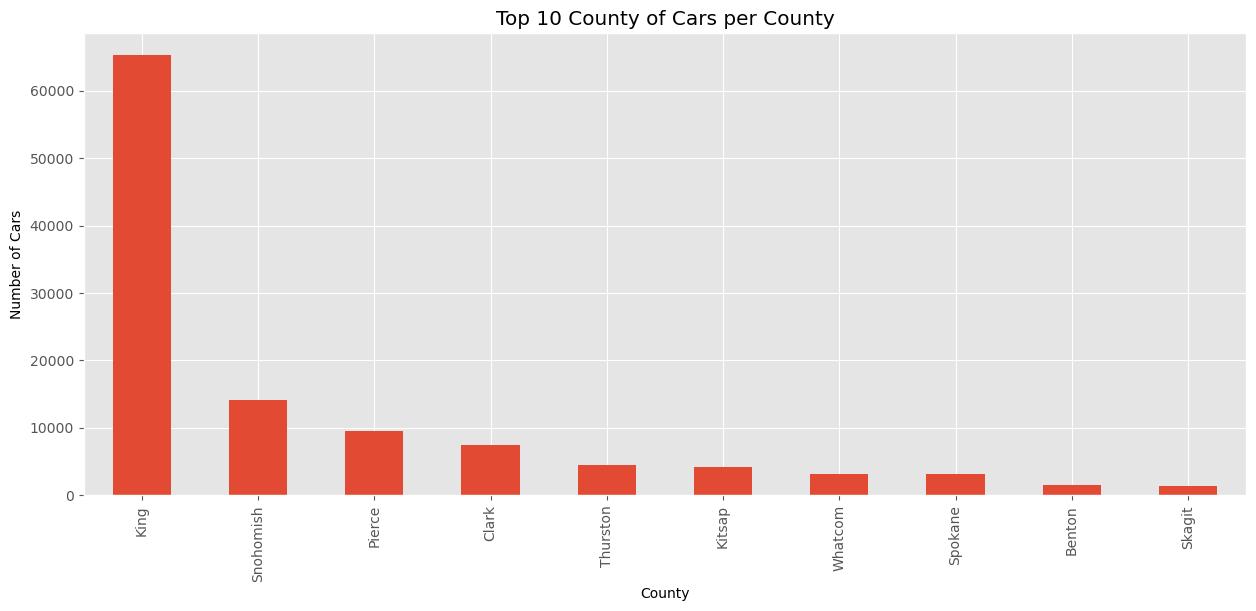

In [36]:
car_counts = df['County'].value_counts().nlargest(10)

# plot the counts
car_counts.plot(kind='bar')
plt.xlabel('County')
plt.ylabel('Number of Cars')
plt.title('Top 10 County of Cars per County')
plt.show()

car_counts_df = car_counts.to_frame()
car_counts_df.style.background_gradient(cmap='Blues')

<h5><center>Figure-8: Plot showing top-10 counties with count of cars</center></h5>

**Answer 1.** King county with 65K cars stands at the top.

### Question 2. What are the Top 10 count of cars per city?

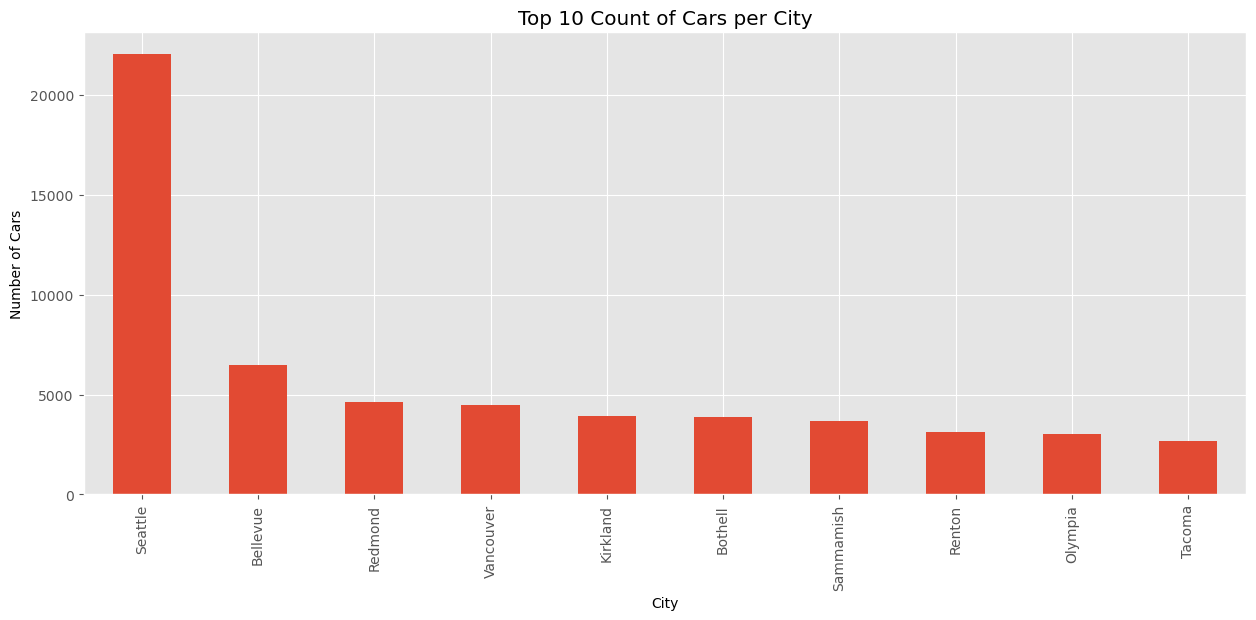

In [37]:
car_counts_Cty = df['City'].value_counts().nlargest(10)

# plot the counts
car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()

car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')

<h5><center>Figure-9: Plot showing top-10 Top 10 count of cars per city</center></h5>

**Answer 2.** Seattle stood at the top, Due to high number of tech giants and their employee living there.

### Question 3. What are the Top 10 count of cars per state?

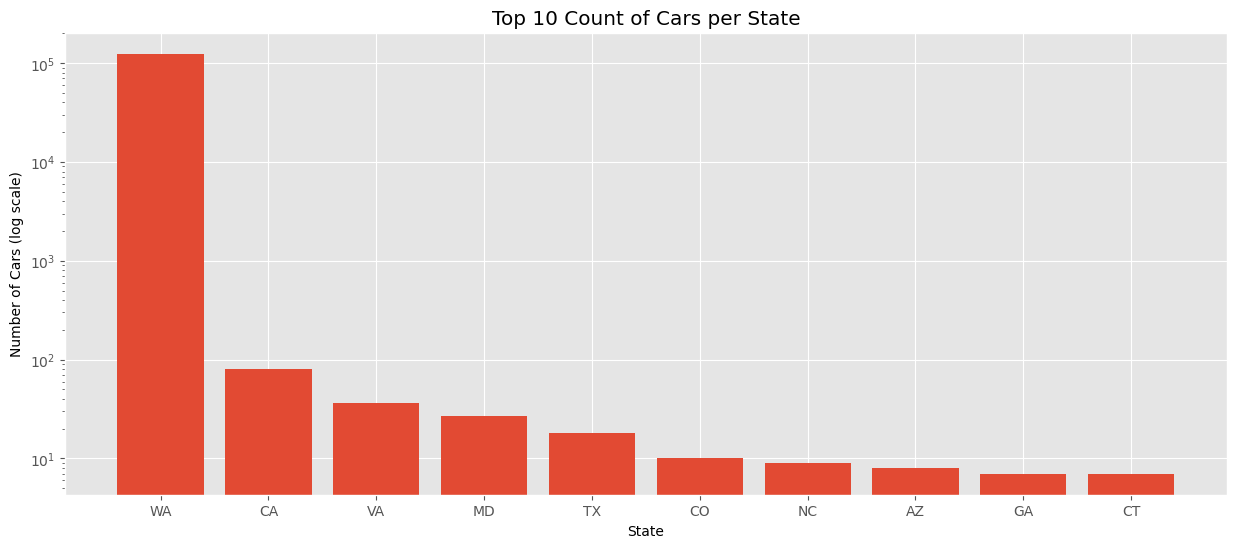

In [38]:
car_counts_St = df['State'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_St.index, car_counts_St.values)
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars (log scale)')
plt.title('Top 10 Count of Cars per State')
plt.show()

car_counts_St_df = car_counts_St.to_frame()
car_counts_St_df.style.background_gradient(cmap='Blues')

<h5><center>Figure-10: lot showing Top 10 count of cars per state</center></h5>

**Answer 3.** Washington as a state has the heighest number of cars.

### Question 4. What are the Top 10 count of cars per postal code?

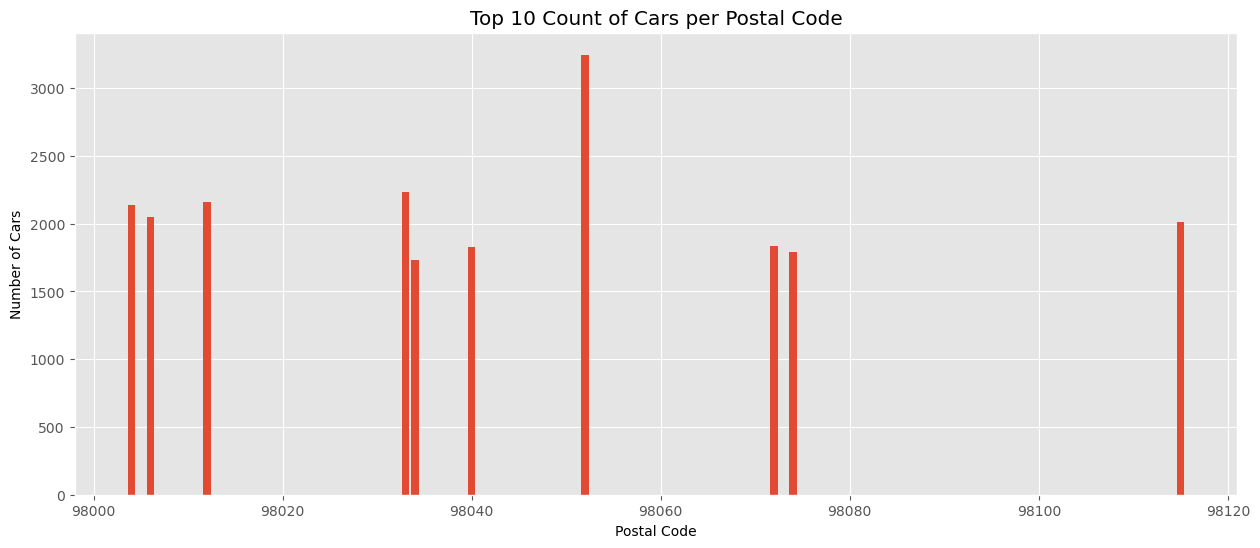

In [39]:
car_counts_pc = df['PostalCode'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_pc.index, car_counts_pc.values)
plt.xlabel('Postal Code')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per Postal Code')
plt.show()

car_counts_pc_df = car_counts_pc.to_frame()
car_counts_pc_df.style.background_gradient(cmap='Blues')

<h5><center>Figure-11: Plot showing Top 10 count of cars per postal code</center></h5>

**Answer 4.** This provide us more insight for other marketing purposes and upselling opportunities.

### Question 5. What are the Top 10 Make distribution count per top 10 County?

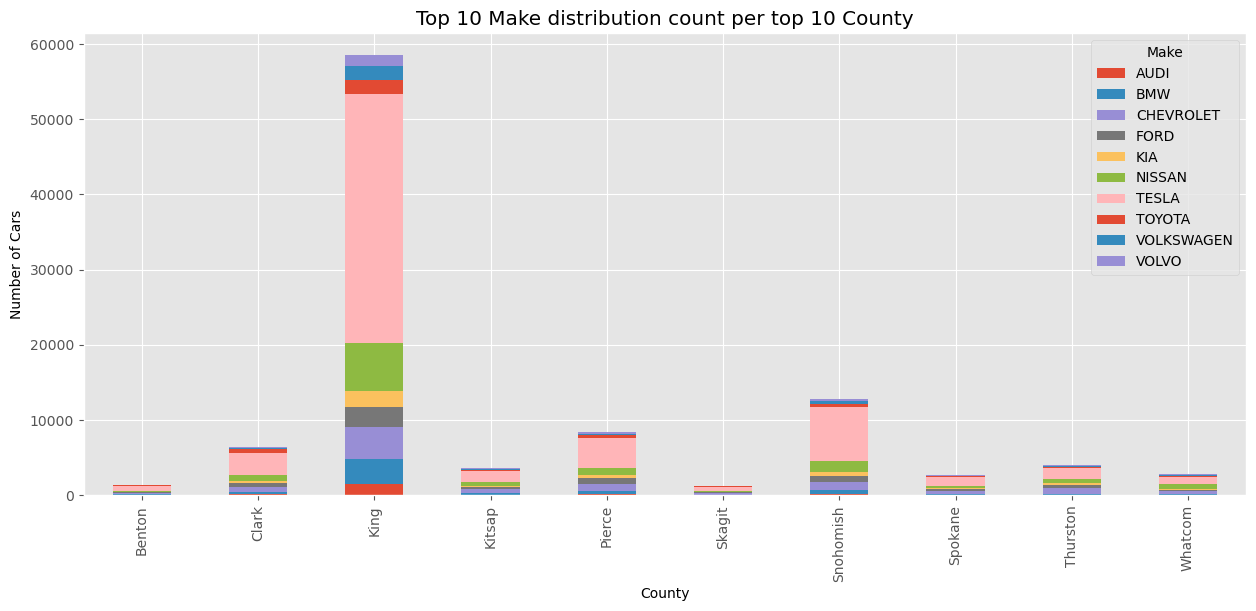

Make       AUDI   BMW  CHEVROLET  FORD   KIA  NISSAN  TESLA  TOYOTA  \
County                                                                
Benton       28    70        203   127    52     112    659      94   
Clark       118   296        722   465   309     771   2926     516   
King       1508  3345       4268  2589  2193    6380  33126    1839   
Kitsap       82   195        488   273   207     570   1376     175   
Pierce      184   408        915   740   450     880   4004     368   
Skagit       23    43        196   105    77     150    508      78   
Snohomish   179   514       1043   797   511    1519   7149     418   
Spokane      78   150        325   236   137     283   1205     121   
Thurston     62   120        777   363   284     529   1425     239   
Whatcom      72    80        355   177   178     575    967     178   

Make       VOLKSWAGEN  VOLVO  
County                        
Benton             29     11  
Clark             191    120  
King             1770   1497  
Kitsap            117    110  
Pierce            231    190  
Skagit             50     31  
Snohomish         366    242  
Spokane            86     33  
Thurston          124     66  
Whatcom           131     48

In [40]:
cnt_MkCounty = df.groupby(['County', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data = cnt_MkCounty.groupby(['County', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
county_counts = grouped_data.groupby('County')['Count'].sum().reset_index()
make_counts = grouped_data.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_counties = county_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)

# Filter the data to only include the top 10 counties
filtered_data = grouped_data[grouped_data['County'].isin(top_counties['County']) & grouped_data['Make'].isin(top_makes['Make'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data = filtered_data.pivot(index='County', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 County')
plt.xlabel('County')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()

pivoted_data.head(10)

<h5><center>Figure-12: Plot showing Top 10 Make distribution count per top 10 County</center></h5>

**Answer 5.** Here we presents the top 10 counties with top 10 consumed make. It is clearly shown that TESLA is the number one choice & Nissan is the second in line.

### Question 6. What are the Top 10 Make distribution count per top 10 City?

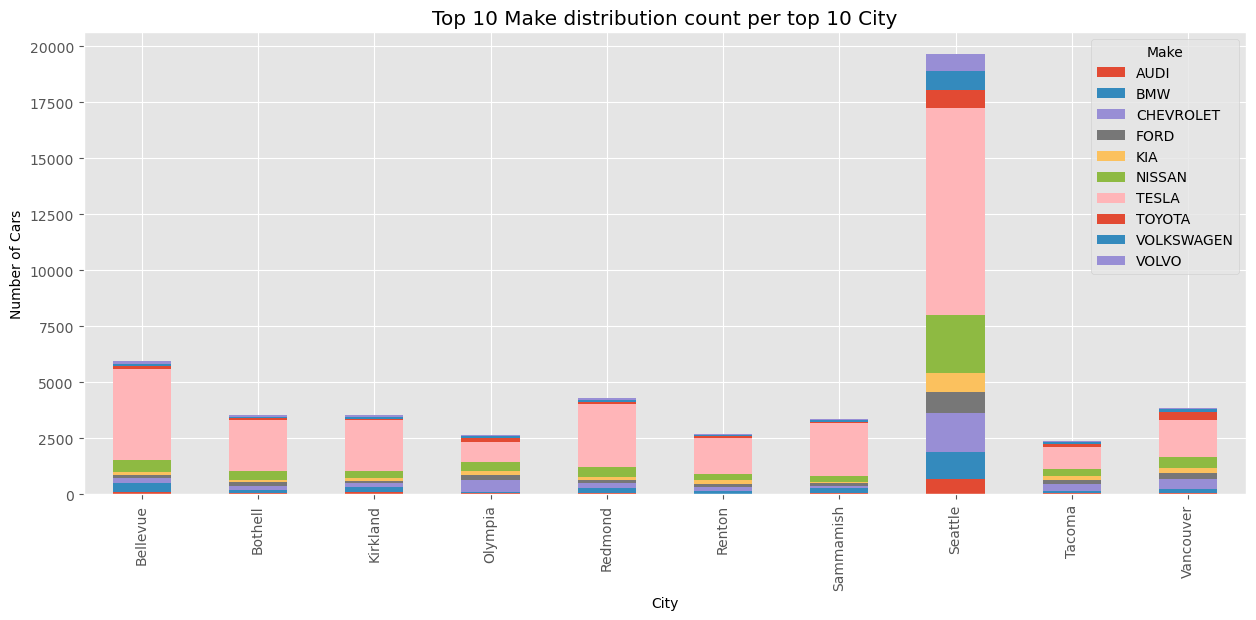

Make       AUDI   BMW  CHEVROLET  FORD  KIA  NISSAN  TESLA  TOYOTA  \
City                                                                 
Bellevue    130   364        222   156  141     526   4056     148   
Bothell      54   156        183   151  111     382   2285      76   
Kirkland    102   216        179   114  120     307   2268      74   
Olympia      46    81        520   235  185     363    915     175   
Redmond      75   233        195   146  112     468   2794     104   
Renton       38   114        183   152  173     249   1596      83   
Sammamish    74   207        114    98   63     282   2358      51   
Seattle     673  1236       1736   906  863    2595   9241     778   
Tacoma       46   114        288   217  139     348    970     117   
Vancouver    63   166        443   290  204     497   1677     348   

Make       VOLKSWAGEN  VOLVO  
City                          
Bellevue           87    112  
Bothell            70     62  
Kirkland           91     96  
Olympia            84     46  
Redmond            95     68  
Renton             67     32  
Sammamish          81     56  
Seattle           868    734  
Tacoma             93     41  
Vancouver         124     66

In [41]:
cnt_MkCity = df.groupby(['City', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_cty = cnt_MkCity.groupby(['City', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
city_counts = grouped_data_cty.groupby('City')['Count'].sum().reset_index()
make_counts = grouped_data_cty.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_cities = city_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)

# Filter the data to only include the top 10 counties
filtered_data_Cty = grouped_data_cty[grouped_data_cty['City'].isin(top_cities['City']) & grouped_data_cty['Make'].isin(top_makes['Make'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_cty = filtered_data_Cty.pivot(index='City', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_cty.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 City')
plt.xlabel('City')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()

pivoted_data_cty.head(10)

<h5><center>Figure-13: Plot showing Top 10 Make distribution count per top 10 City</center></h5>

**Answer 6.** Here we presents the top 10 cities with top 10 consumed makes. It is clearly shown that TESAL is the number one choice & Nissan is the second in line. Seattle is the city with heighest number of cars

## Question 7. What are the Top 10 Make distribution count per top 10 State?

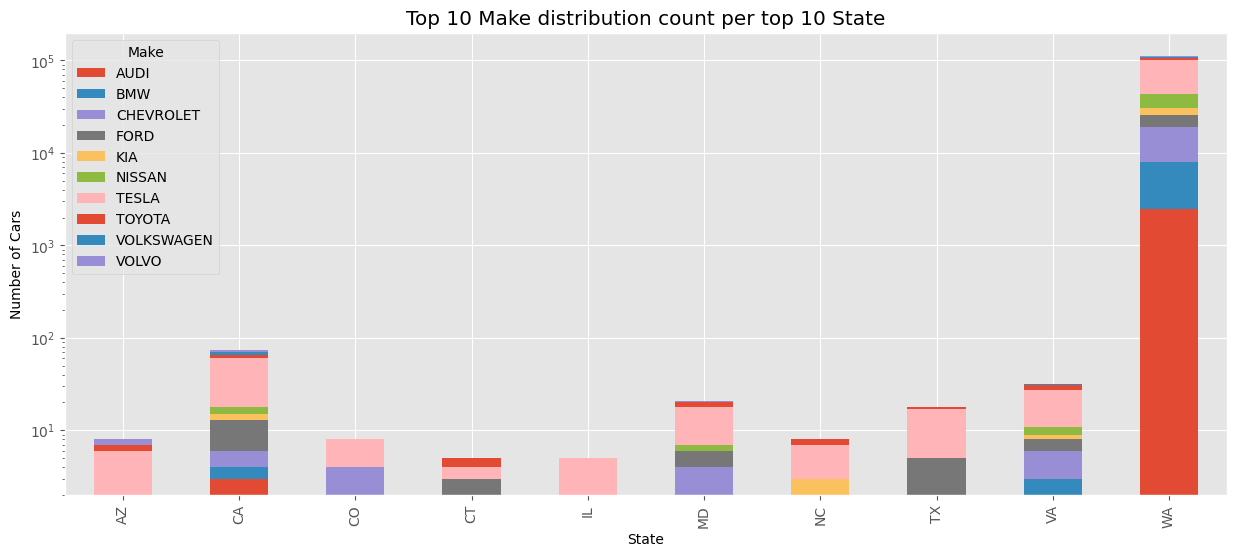

Make     AUDI     BMW  CHEVROLET    FORD     KIA   NISSAN    TESLA  TOYOTA  \
State                                                                        
AZ        0.0     0.0        0.0     0.0     0.0      1.0      5.0     1.0   
CA        3.0     1.0        2.0     7.0     2.0      3.0     43.0     5.0   
CO        0.0     2.0        2.0     0.0     0.0      0.0      4.0     0.0   
CT        0.0     0.0        2.0     1.0     0.0      0.0      1.0     1.0   
IL        0.0     0.0        0.0     0.0     0.0      0.0      5.0     0.0   
MD        1.0     1.0        2.0     2.0     0.0      1.0     11.0     2.0   
NC        0.0     1.0        1.0     0.0     1.0      0.0      4.0     1.0   
TX        0.0     1.0        0.0     4.0     0.0      0.0     12.0     1.0   
VA        0.0     3.0        3.0     2.0     1.0      2.0     16.0     4.0   
WA     2479.0  5563.0    10819.0  6655.0  4836.0  12932.0  56980.0  4645.0   

Make   VOLKSWAGEN   VOLVO  
State                      
AZ            0.0     1.0  
CA            4.0     4.0  
CO            0.0     0.0  
CT            0.0     0.0  
IL            0.0     0.0  
MD            0.0     1.0  
NC            0.0     0.0  
TX            0.0     0.0  
VA            1.0     0.0  
WA         3362.0  2510.0

In [43]:
cnt_Mk_St = df.groupby(['State', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_St = cnt_Mk_St.groupby(['State', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
st_counts = grouped_data_St.groupby('State')['Count'].sum().reset_index()
make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_States = st_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data_St = grouped_data_St[grouped_data_St['State'].isin(top_States['State']) & grouped_data_St['Make'].isin(top_makes['Make'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_St = filtered_data_St.pivot(index='State', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_St.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 State')
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()

pivoted_data_St.head(10)

<h5><center>Figure-14: Plot showing Top 10 Make distribution count per top 10 State</center></h5>

**Answer 7.** Washington clearly is the biggest consumer in compariosn to all other states. One more observation is that there is big marketing opportunity for Car vendors like AUDI, BMW, in other states.

### Question 8. What are the EVT Distribution count per state?

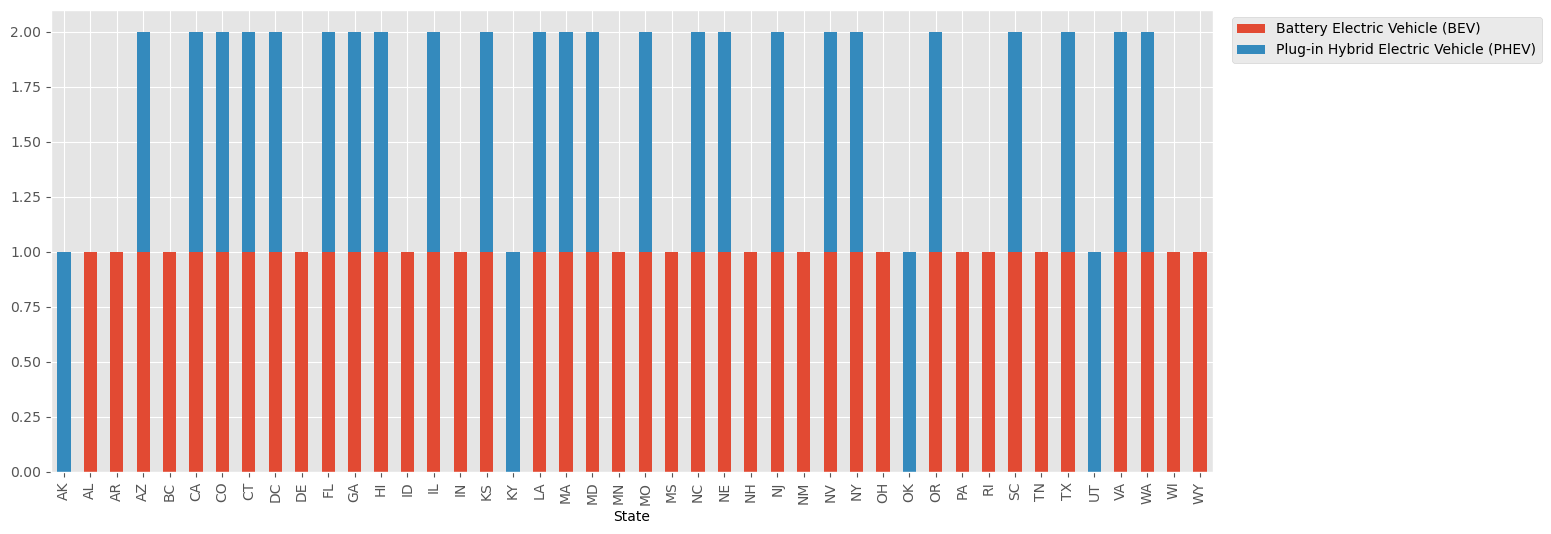

State                   Electric_Vehicle_Type  Count
6    CA          Battery Electric Vehicle (BEV)     56
7    CA  Plug-in Hybrid Electric Vehicle (PHEV)     24
8    CO          Battery Electric Vehicle (BEV)      8
3    AZ          Battery Electric Vehicle (BEV)      6
2    AR          Battery Electric Vehicle (BEV)      3
4    AZ  Plug-in Hybrid Electric Vehicle (PHEV)      2
5    BC          Battery Electric Vehicle (BEV)      2
9    CO  Plug-in Hybrid Electric Vehicle (PHEV)      2
0    AK  Plug-in Hybrid Electric Vehicle (PHEV)      1
1    AL          Battery Electric Vehicle (BEV)      1

In [44]:
# EVT Distribution count per state
evt_Dis_cnt = df.groupby(['State', 'Electric_Vehicle_Type']).size().reset_index(name='Count')
evt_Dis_cnt.groupby(['State', 'Electric_Vehicle_Type'])['Count'].count().unstack().plot(kind='bar', stacked=True)

# Move legend outside of plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

evt_Dis_cnt.head(10).sort_values(by='Count', ascending=False)

<h5><center>Figure-15: Plot showing EVT Distribution count per state</center></h5>

**Answer 8.** Very useful insights from a mrketing POV., there is a high potential of BEV's makers to promote BEVs in states like AK & AL., On the other side Arizona has a big market waiting for PHEV vehicles.

### Question 9. What are the Electric Utility Distribution in top 10 cities with highest number of cars?

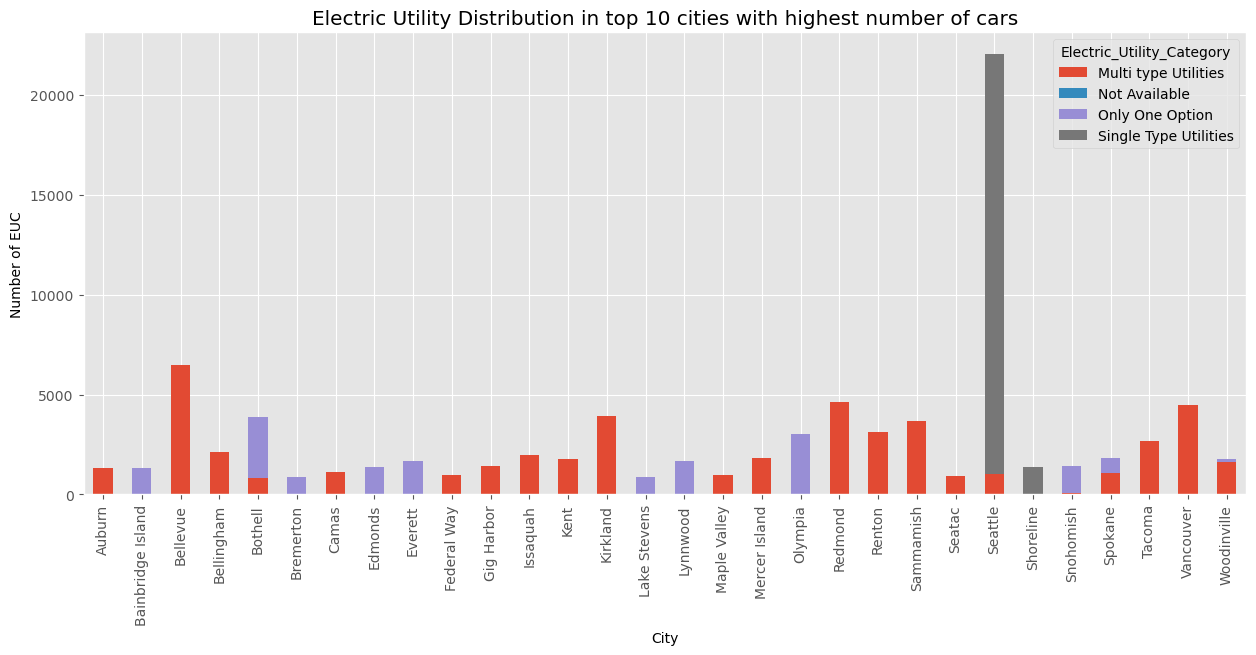

Electric_Utility_Category  Multi type Utilities  Not Available  \
City                                                             
Auburn                                   1319.0            0.0   
Bainbridge Island                           0.0           13.0   
Bellevue                                 6488.0            1.0   
Bellingham                               2119.0            0.0   
Bothell                                   834.0            0.0   
Bremerton                                   0.0            0.0   
Camas                                    1111.0            0.0   
Edmonds                                     0.0            4.0   
Everett                                     3.0            0.0   
Federal Way                               964.0            0.0   

Electric_Utility_Category  Only One Option  Single Type Utilities  
City                                                               
Auburn                                 0.0                    0.0  
Bainbridge Island                   1320.0                    0.0  
Bellevue                               0.0                    0.0  
Bellingham                             7.0                    0.0  
Bothell                             3018.0                    0.0  
Bremerton                            866.0                    0.0  
Camas                                  0.0                    0.0  
Edmonds                             1385.0                    0.0  
Everett                             1664.0                    0.0  
Federal Way                            0.0                    0.0

In [45]:
cnt_Cty_EUD = df.groupby(['City', 'Electric_Utility_Category']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_Cty_EUD = cnt_Cty_EUD.groupby(['City', 'Electric_Utility_Category'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
Cty_EUD_counts = grouped_data_Cty_EUD.groupby('City')['Count'].sum().reset_index()
# make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_Cty_EUD_counts = Cty_EUD_counts.sort_values(by='Count', ascending=False).head(30)
# top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)

# Filter the data to only include the top 10 counties
filtered_data_Cty_EUD = grouped_data_Cty_EUD[grouped_data_Cty_EUD['City'].isin(top_Cty_EUD_counts['City'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_Cty_EUD = filtered_data_Cty_EUD.pivot(index='City', columns='Electric_Utility_Category', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_Cty_EUD.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Electric Utility Distribution in top 10 cities with highest number of cars')
# plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of EUC')

# Show the plot
plt.show()

pivoted_data_Cty_EUD.head(10)

<h5><center>Figure-16: Plot showing Electric Utility Distribution in top 10 cities with highest number of cars</center></h5>

**Answer 9.** Seattle has a big market opportunity for other utiilites offering.

### Question 10. What are the Top 5 vs Bottom 5 Comparison?

Text(0.5, 1.0, 'Bottom 5 Cars')

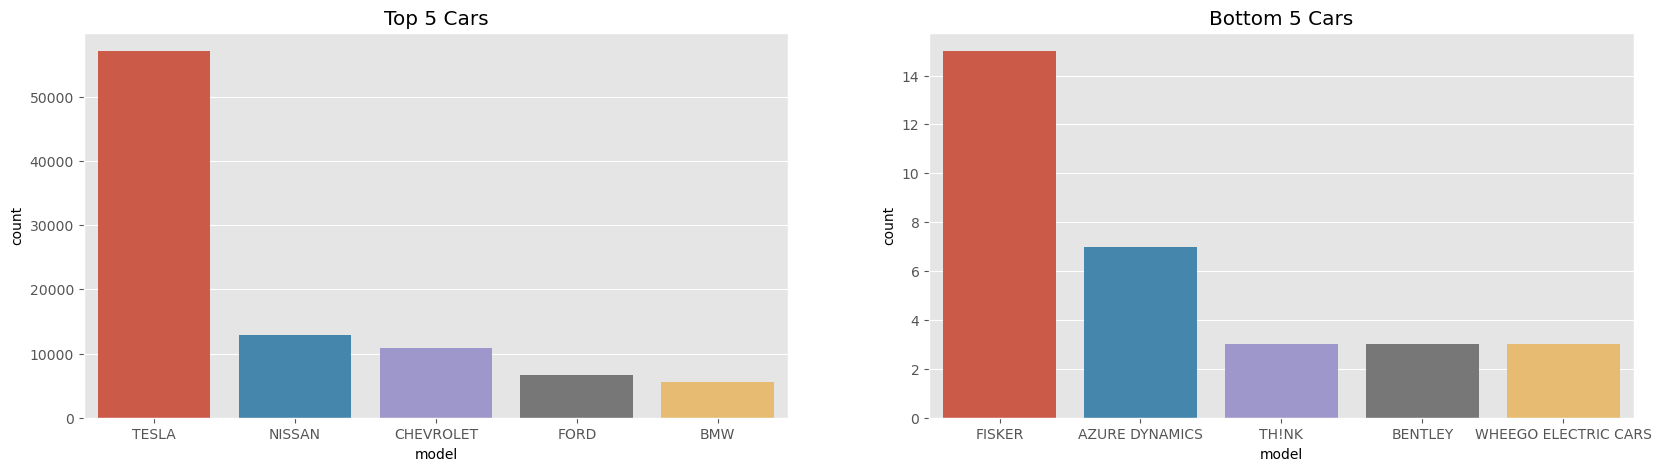

In [46]:
car_market_share = pd.DataFrame(df.groupby('Make')['VIN'].count().reset_index()).sort_values(by='VIN',ascending=False).reset_index(drop=True)
car_market_share.columns = ['model','count']
car_market_share_top_5 = car_market_share.head(5)
car_market_share_bottom_5 = car_market_share.tail(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=car_market_share_top_5, x="model", y="count",ax=axes[0])
sns.barplot(data=car_market_share_bottom_5, x="model", y="count",ax=axes[1])
axes[0].set_title('Top 5 Cars')
axes[1].set_title('Bottom 5 Cars')

<h5><center>Figure-17: Plot showing Top 5 vs Bottom 5 Comparison</center></h5>

**Answer 10.** TESLA is the market leader by large. However, Bentley being the expensive brand in luxury cars is struggling in the Electric car market.

### Question 11. What are the Distances Travel by vehicle make per electric charge?

In [47]:
import plotly.express as ps
km_range = pd.DataFrame(df.groupby('Make')['Electric_Range'].mean().reset_index()).sort_values(by='Electric_Range',ascending=False).reset_index(drop=True).head(10)
km_range.columns = ['model','km_range']
ps.pie(data_frame=km_range, names='model', values='km_range', hover_name='km_range',title='Top 10 Model with KM range',hole=True)

<h5><center>Figure-18: Plot showing Distances Travel by vehicle make per electric charge</center></h5>

**Answer 11.** Now here is an interesting insight, TESLA being the market leader is far behind when it comes to distance travelled by its vehicles per charge.

### Question 12. What are the Year Wise Cars sales growth?

In [48]:
# Year Wise Cars
year_wise_cars = df.groupby('ModelYear')['VIN'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']

fig = ps.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()

<h5><center>Figure-19: Plot showing Year Wise Cars sales growth of EVs</center></h5>

In [49]:
year_wise_cars.sort_values(by='num_cars', ascending=False).head(10)

year  num_cars
19  2022     27522
18  2021     18296
15  2018     14224
20  2023     13353
17  2020     10926
16  2019     10450
14  2017      8558
13  2016      5702
12  2015      4935
10  2013      4581

**Answer 12.** We can see the market trust in electric vehicles started to built up after 2010. The demand of electric vehicles is ever since going high.

There is a drop observed in 2019, when mainlly there was a gap in supply & demand. due to COVID-19 lockdowns.

### Question 13. Plotting the lat and lon

In [50]:
df['lat'] = df['Vehicle_Location'].str.split(' ').str[1].str.split('(').str[1].astype(float)
df['lon'] = df['Vehicle_Location'].str.split(' ').str[2].str.split(')').str[0].astype(float)
df['lat'] = df['lat'].fillna(0)
df['lon'] = df['lon'].fillna(0)

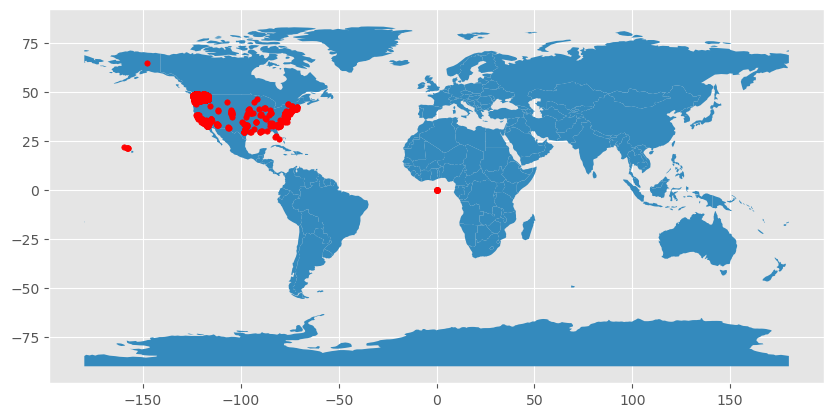

In [50]:
geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

<h5><center>Figure-20: Plotting the lat and lon</center></h5>

## 4. Summary & Conclusion
The Electric Vehicle Population dataset contains information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through Washington State Department of Licensing (DOL). Through exploratory data analysis, the top 10 counts of cars per county, city, state, and postal code were determined. King County had the most cars registered, followed by Snohomish and Pierce counties. Seattle had the most cars registered by city, followed by Bellevue and Redmond. Washington had the most cars registered by state, followed by California and Virginia.

The dataset also provided insight into the top 10 consumed car makers by county, city, and state, with Tesla being the most popular make overall. There appears to be an opportunity for car vendors like Audi and BMW to market their vehicles in other states. The top 10 postal codes were also identified, providing further insight for marketing and upselling opportunities.

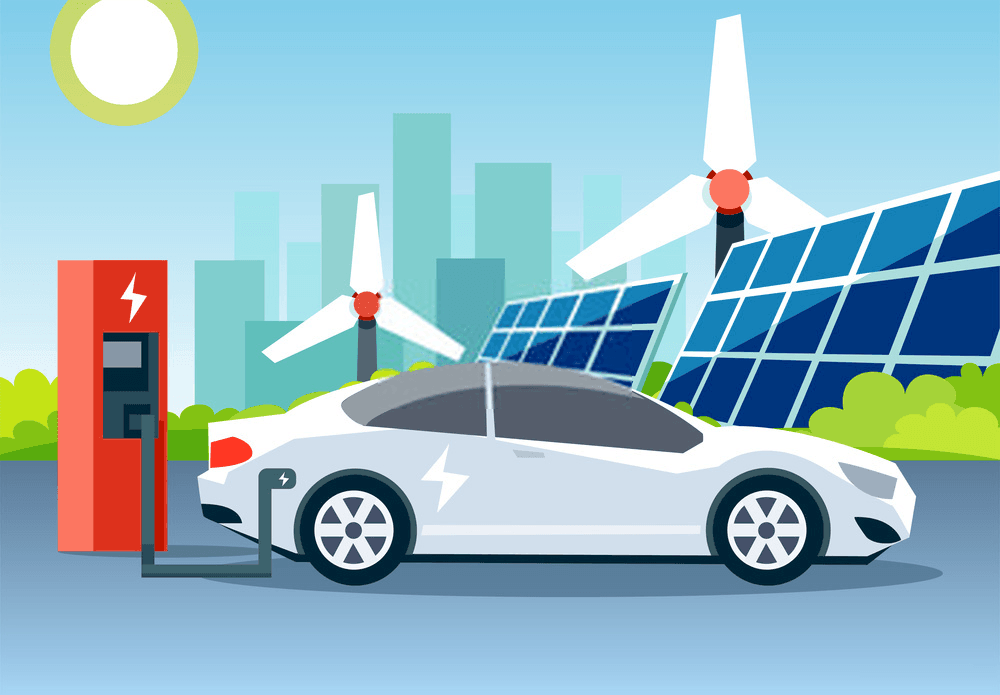

<h5><center>Figure-21: Electric Vehicle</center></h5>

  To Conclude:

* King county has the highest number of electric cars registered with 65,268 cars, followed by Snohomish and Pierce county.
* Seattle is the city with the highest number of electric cars with 22,009 cars, followed by Bellevue and Redmond.
* Washington state has the highest number of electric cars with 1,24,419 cars, followed by California, Virginia, and Maryland.
* The top 10 postal codes with the highest number of electric cars are in the Seattle metro area, with 98052 having the most with 3,247 cars.
* Tesla is the most popular electric car make in Washington state, followed by Nissan, Chevrolet, and Toyota.
* Tesla is also the most popular make in Seattle, followed by Nissan, Chevrolet, and BMW.
* Washington state has the highest number of Audi, BMW, and Chevrolet electric cars registered among all states.
* There is a big marketing opportunity for car vendors like Audi, BMW, and Chevrolet in other states, such as Arizona, Florida, and Colorado.
--------